In [0]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [0]:
data = pd.read_csv("train.csv")

In [0]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
X = data[[col for col in data.columns if "pixel" in col]].values
y = pd.get_dummies(data["label"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Baseline model : Knn

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
score = classifier.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9648809523809524


### CNN

In [0]:
from keras.models import Sequential, Model
from keras.layers import Dense, Input, Embedding, Flatten, Conv1D, GlobalMaxPooling1D, Conv2D, MaxPooling2D, Dropout

In [0]:
batch_size = 2048
epochs = 150

In [0]:
X_train_cnn = X_train.reshape(len(X_train), 28, 28, 1) / 255
X_test_cnn = X_test.reshape(len(X_test), 28, 28, 1) / 255

In [0]:
len()

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(100, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(80, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(50, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss='categorical_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

history = model.fit(X_train_cnn, y_train,
             batch_size=batch_size,
             epochs=epochs,
             validation_data=(X_test_cnn, y_test),
             shuffle=True)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 33600 samples, validate on 8400 samples
Epoch 1/150
33600/33600 [==============================] - 8s 223us/step - loss: 1.9897 - acc: 0.3295 - val_loss: 1.1149 - val_acc: 0.6779
Epoch 2/150
33600/33600 [==============================] - 1s 19us/step - loss: 0.8991 - acc: 0.7001 - val_loss: 0.3681 - val_acc: 0.8910
Epoch 3/150
33600/33600 [==============================] - 1s 19us/step - loss: 0.4049 - acc: 0.8729 - val_loss: 0.2067 - val_acc: 0.9376
Epoch 4/150
33600/33600 [==============================] - 1s 19us/step - loss: 0.2564 - acc: 0.9213 - val_loss: 0.1518 - val_acc: 0.9543
Epoch 5/150
33600/33600 [==============================] - 1s 19us/step - loss: 0.1956 - acc: 0.9411 - val_loss: 0.1210 - val_acc: 0.9633
Epoch 6/150
33600/33600 [==============================] - 1s 19us/step - loss: 0.1619 - acc: 0.9526 - val_loss: 0.1090 - val_acc: 0.9688
Epoch 7/150
33600/33600 [=

In [0]:
def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

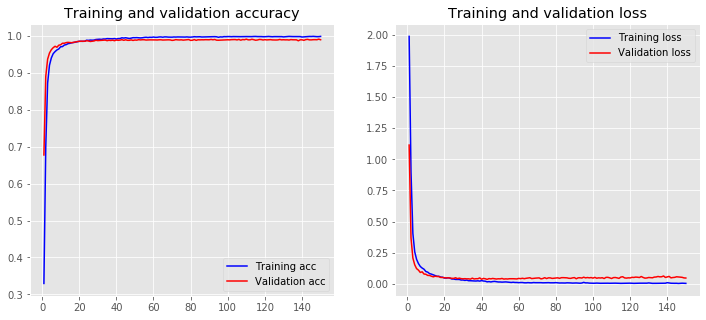

In [0]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plot_history(history)

In [0]:
scores = model.evaluate(X_test_cnn, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

8400/8400 [==============================] - 1s 66us/step
Test loss: 0.045214666597860234
Test accuracy: 0.9903571428571428


### Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [0]:
X = data[[col for col in data.columns if "pixel" in col]].values
y = (data["label"]).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
forest = RandomForestClassifier(n_estimators=500)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
score = forest.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9645238095238096


### Do preds

In [0]:
data_test = pd.read_csv("test.csv")
X_to_test = data_test[[col for col in data.columns if "pixel" in col]].values

X_test_cnn_to_sub = X_to_test.reshape(len(X_to_test), 28, 28, 1)

In [0]:
data_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
preds = model.predict(X_test_cnn_to_sub)
indexes = range(1, 28001)

In [0]:
preds2 = [np.argmax(x) for x in preds]

In [0]:
dfObj = pd.DataFrame(columns=['ImageId', 'Label'])

In [0]:
dfObj["ImageId"] = indexes
dfObj["Label"] = preds2

In [0]:
dfObj.to_csv("sample_submission.csv", index=False)

In [0]:
dfObj

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
